# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

In [2]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  
There are 9 reps in the North branch.

In [4]:
#Code Used:
north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  
There are 11 reps in the South branch.

In [5]:
#Code Used:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 
The average times for the North branch are:
- Busy Minutes           9.987755
- Not Ready Minutes      1.914286
- Incoming Wait Time     3.048780

In [6]:
#Code Used:
north_df_avg = north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']]
north_df_avg.mean().round(2)

#north_df_avg = north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time']].mean() is another syntax

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

The average times for the South branch are:
- Busy Minutes          10.054140
- Not Ready Minutes      1.910828
- Incoming Wait Time     3.000000


In [7]:
#Code Used:
south_df_avg = south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']]
south_df_avg.mean().round(2)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

- 9:00AM = 10
- 10:00AM = 99
- 11:00AM = 56
- 12:00PM = 120
- 1:00PM = 40
- 2:00PM = 65
- 3:00PM = 73
- 4:00PM = 53
- 5:00PM = 43


In [8]:
# Code Used:
combined_df = pd.concat([north_df, south_df])
combined_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [9]:
combined_df['Time Block'].describe()

count          559
unique           9
top       12:00 PM
freq           120
Name: Time Block, dtype: object

In [10]:
combined_df['Time Block'].value_counts()

12:00 PM    120
10:00 AM     99
3:00 PM      73
2:00 PM      65
11:00 AM     56
4:00 PM      53
5:00 PM      43
1:00 PM      40
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes =  9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.078
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There are missing data. In this instance, I would remove/drop the missing values since they do not provide any insight.

In [11]:
# Code Used
# Add Additional Cells as needed.

north_df.info(verbose=True)
pd.options.display.max_columns = 100
north_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [12]:
south_df.info(verbose=True)
pd.options.display.max_columns = 100
south_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There could be leading and/or trailing whitespaces. I rectified it by removing the whitespaces.

In [13]:
#Code Used
# Add Additional Cells as needed.
north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [14]:
#remove leading or trailing whitespaces
north_df['Sale'] = north_df['Sale'].str.replace(" ","")
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [15]:
#check if whitespaces have been removed.
north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicates.

In [16]:
#Code Used
# Add Additional Cells as needed.
north_df.loc[north_df.duplicated(), :]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [17]:
south_df.loc[south_df.duplicated(), :]

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: The Unnamed column is unnecessary. I would drop it.

In [18]:
#Code Used
# Add Additional Cells as needed.
# remove an unnecessary column (Unnamed: 0)

cleaned_north_df = north_df.drop('Unnamed: 0', axis=1)
cleaned_north_df.head()
# south_df = south_df.drop('Unnamed')
# south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [19]:
cleaned_south_df = north_df.drop('Unnamed: 0', axis=1)
cleaned_south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [20]:
# Create dataframe for the entire company named df

df = pd.concat([north_df, south_df])
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls


In [21]:
# Code Used
# Add Additional Cells as needed.

#to get the names of the reps and number of calls
north_df_calls = north_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False) 
print(north_df_calls)

Rep ID
Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Cam       24
Xander    24
Amanda    23
Andy      23
Name: Calls, dtype: int64


In [22]:
south_df_calls = south_df.groupby(['Rep ID'])['Calls'].sum().sort_values(ascending=False)
print(south_df_calls)

Rep ID
Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Calls, dtype: int64


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.85%
- South Branch = 1.27%
- Company Wide = 1.96%
- Do any of these fall out of the optimal range of 2-5%?  *South branch falls out of the optimal range but in a positive way.

In [23]:
# Code Used
# Add Additional Cells as needed.

# Code Used
# Add Additional Cells as needed.

ave_call_abandonment = df.groupby(['Branch'])['Abandoned'].describe()
ave_call_abandonment.head()

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
North,245.0,0.028571,0.166940,0.0,0.0,0.0,0.0,1.0
South,314.0,0.012739,0.112324,0.0,0.0,0.0,0.0,1.0


In [24]:
ave_call_abandonment = df.groupby(['Branch'])['Abandoned'].mean() * 100
ave_call_abandonment

Branch
North    2.857143
South    1.273885
Name: Abandoned, dtype: float64

In [25]:
#company wide abandonment rate
df['Abandoned'].mean()*100

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40%, with 33 calls
- South Branch = 38%, with 48 calls
- Company Wide = 39%, with 81 calls

In [26]:
# Code Used
# Add Additional Cells as needed.
#get the total of calls that were answered in 2 seconds or less


service_level_branch = df[df['Incoming Wait Time'] < 3].groupby(['Branch'])['Incoming Wait Time'].agg('count').to_frame()
service_level_branch.rename(columns = {list(service_level_branch)[0]: 'Fast Answered'}, inplace = True)
service_level_branch

,Fast Answered
Branch,
North,33
South,48


In [27]:
#get the total calls received by each branch
total_calls_combined = df.groupby(['Branch'])['Incoming Wait Time'].agg('count').to_frame()
total_calls_combined.rename(columns = {list(total_calls_combined)[0]: 'Total Incoming Calls'}, inplace = True)
total_calls_combined

,Total Incoming Calls
Branch,
North,82
South,126


In [28]:
#combine both dataframes 
combined_df3 = pd.concat([service_level_branch,total_calls_combined], axis=1)
combined_df3

,Fast Answered,Total Incoming Calls
Branch,,
North,33,82
South,48,126


In [29]:
#percentage of calls answered in 2seconds or less
combined_df3['% Fast'] = ((combined_df3['Fast Answered']/combined_df3['Total Incoming Calls'])*100).round(0).astype(int).astype(str) + '%'
combined_df3

,Fast Answered,Total Incoming Calls,% Fast
Branch,,,
North,33,82,40%
South,48,126,38%


In [30]:
#company wide total calls
total_calls_combined = df['Calls'].sum()
total_calls_combined

559

In [31]:
total_fast_answered = service_level_branch['Fast Answered'].sum()
total_fast_answered

81

In [32]:
#company wide service level %
company_service_level = ((service_level_branch['Fast Answered'].sum()/df['Incoming Wait Time'].agg('count'))*100).round().astype(int)
company_service_level

39

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [33]:
# Code Used 
ave_speed = df.groupby(['Branch'])['Incoming Wait Time'].describe()
ave_speed

,count,mean,std,min,25%,50%,75%,max
Branch,,,,,,,,
North,82.0,3.04878,1.456382,1.0,2.0,3.0,4.0,5.0
South,126.0,3.00000,1.308434,1.0,2.0,3.0,4.0,5.0


In [34]:
df['Incoming Wait Time'].mean()

3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:
The abandonment reate per queue are as follows:
- A: 4.16% 
- B: 2.013%
-C: 0.72%
-D: 1.70%

I chose a bar plot as it is easy to understand. 

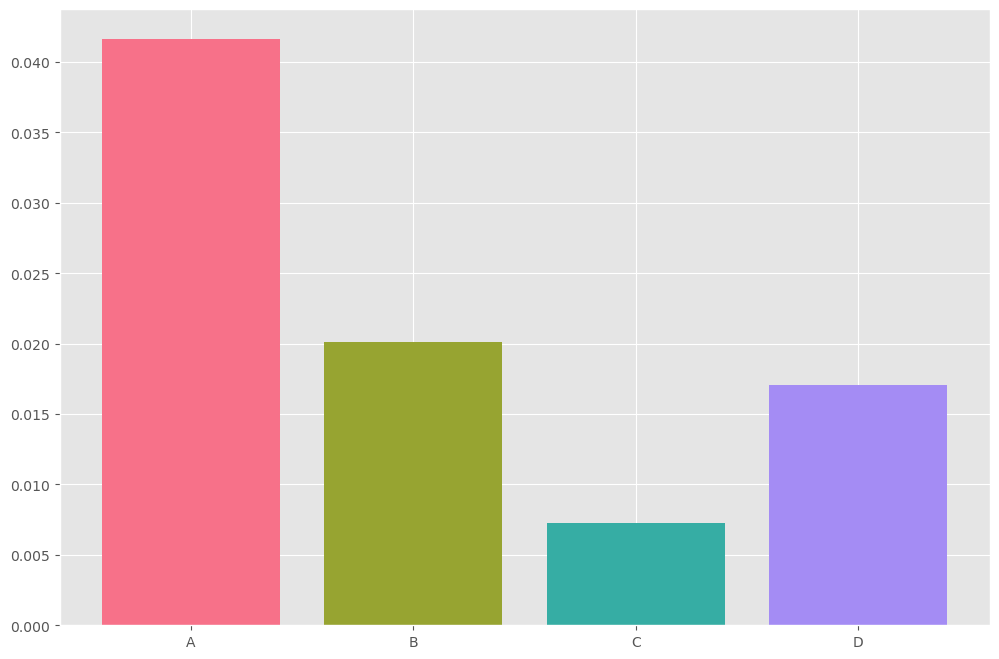

<Figure size 1200x800 with 0 Axes>

In [35]:
# Create visualization 1 here
# Import any additional libraries needed with alias


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

    
#Your Code Here:
import seaborn as sns

ind = np.arange(len(abandonment_rates))
palette = sns.color_palette("husl", len(abandonment_rates))

plt.bar(ind, list(abandonment_rates.values()), color=palette)
plt.xticks(ind, list(abandonment_rates.keys()))
plt.show()
plt.savefig('abandonment_rates.png')

# plt.bar(*zip(*abandonment_rates.items()))
# plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
I chose a combination of bar and line plots. Superimposing the line over the bars made it easier to convey what the data is saying,

In [36]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:



In [37]:
north_plt

,Rep ID,Incoming Wait Time
0,Amanda,2.400000
1,Andy,3.600000
2,Brent,2.125000
3,Cam,2.909091
4,Duke,2.785714
5,Joe,3.600000
6,Lilly,3.083333
7,Todd,3.500000
8,Xander,3.333333


In [38]:
quick_stats

,Calls
Rep ID,
Amanda,3
Andy,3
Brent,6
Cam,5
Duke,6
Joe,2
Lilly,4
Todd,2
Xander,2


In [39]:
service_level

,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


In [40]:
#combined all three to one dataframe for easier plotting
viz_2 = pd.merge(pd.merge(north_plt,quick_stats,on='Rep ID'),service_level,on='Rep ID')
print(viz_2)

   Rep ID  Incoming Wait Time  Calls  Calls_x  Calls_y  Service Level %
0  Amanda            2.400000      3        3        5        60.000000
1    Andy            3.600000      3        3       10        30.000000
2   Brent            2.125000      6        6        8        75.000000
3     Cam            2.909091      5        5       11        45.454545
4    Duke            2.785714      6        6       14        42.857143
5     Joe            3.600000      2        2       10        20.000000
6   Lilly            3.083333      4        4       12        33.333333
7    Todd            3.500000      2        2        6        33.333333
8  Xander            3.333333      2        2        6        33.333333


<AxesSubplot:>

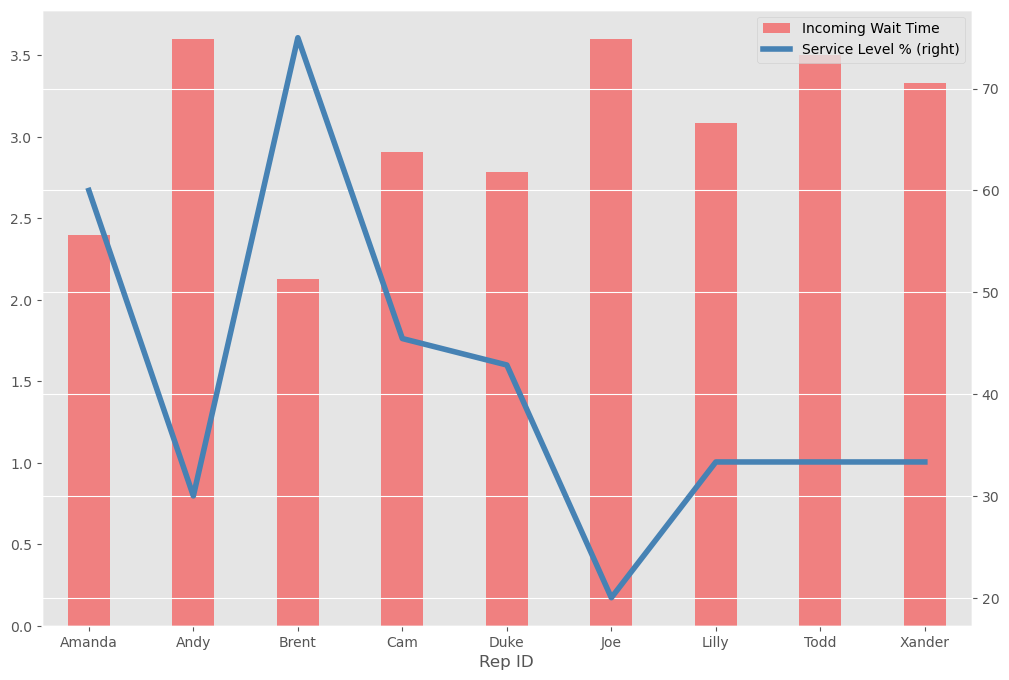

In [41]:
import matplotlib.pyplot as plt # Impot the relevant module

fig, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
viz_2.plot(x = 'Rep ID', y = 'Incoming Wait Time', ax = ax, kind = 'bar', color = 'lightcoral', width = 0.4)

# Plot the second x and y axes. By secondary_y = True a second y-axis is requested:

viz_2.plot(x = 'Rep ID', y = 'Service Level %', ax = ax, secondary_y = True, color = 'steelblue', linewidth = 4) 



#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:
|                 | Incoming Calls | Outgoing Calls |
|-----------------|----------------|                |
|  Complaints     |   51           |      0         |
|  Sales_support  |   75           |     123        |
|  Product_support|   82           |     228        |

             
> Chart style you chose and why: Bars again as it is easier to see the comparison between the incoming and outgoing calls.

In [42]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
for_viz = {
  "Complaints" : [complaints.get('Incoming', 0), complaints.get('Outgoing', 0)],
  "Sales_support" : [sales_support.get('Incoming', 0), sales_support.get('Outgoing', 0)],
  "Product_support" : [product_support.get('Incoming', 0), product_support.get('Outgoing', 0)]  
}

for_viz

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


{'Complaints': [51, 0],
 'Sales_support': [75, 123],
 'Product_support': [82, 228]}

In [43]:
# convert to data frame 
# .T transposes letter categories to the x-axis

import pandas as pd
for_viz_df = pd.DataFrame(for_viz).T
for_viz_df.head()

,0,1
Complaints,51,0
Sales_support,75,123
Product_support,82,228


In [44]:
#rename column to have a clearer legend for graph
for_viz_df.rename(columns={0: 'Incoming Calls', 1: 'Outgoing Calls'}, inplace=True)
for_viz_df.head()

,Incoming Calls,Outgoing Calls
Complaints,51,0
Sales_support,75,123
Product_support,82,228


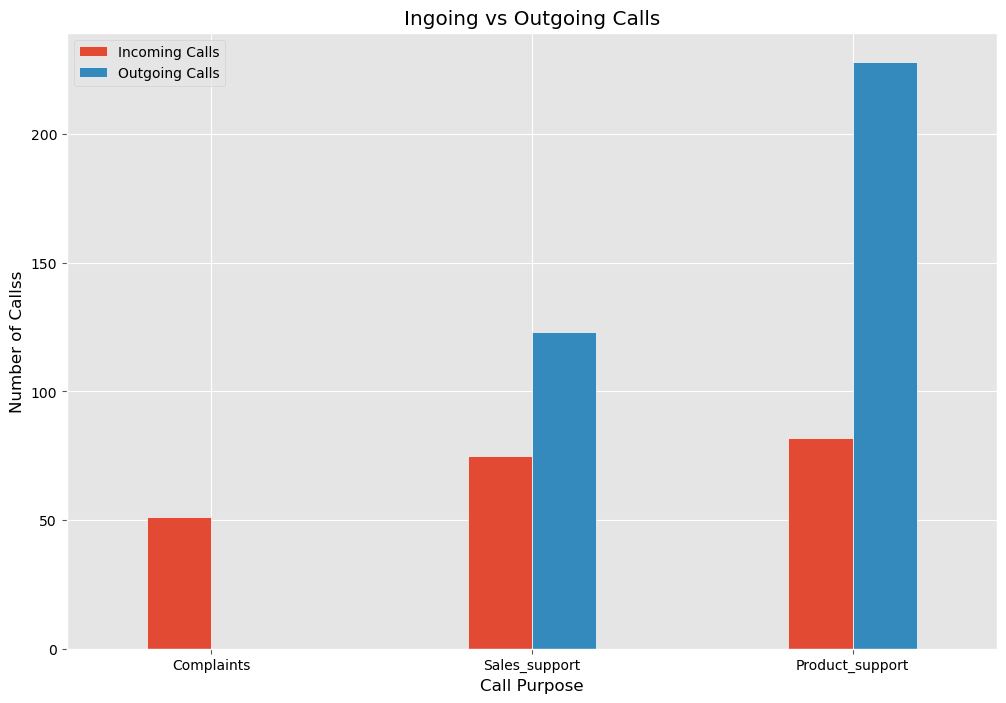

In [45]:
for_viz_df.plot.bar(edgecolor = 'white', width = 0.4)
plt.title('Ingoing vs Outgoing Calls',color = 'black')
plt.xticks(color = 'black', rotation=360)
plt.yticks(color = 'black')
plt.xlabel('Call Purpose',color = 'black')
plt.ylabel('Number of Callss',color = 'black')
plt.legend(loc='upper left')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The South branch is operating more efficiently. The South branch's abandonment rate is lower, the South branch reps' answer the calls quicker, and the service level percentage is higher - meaning, more calls are answered within 2 seconds or less.

In [46]:
# import image module
from IPython.display import Image
 
# get the image
Image(url="abandonment.png", width=600, height=300)

In [47]:
Image(url="avg_speed.png", width=600, height=300)

In [48]:
Image(url="service_level_compare.png", width=600, height=300)

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: North branch has 9 reps and South branch has 11 reps. The North branch would benefit from the extra help.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Knowing the duration of each call could probably be a good info to have.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [49]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times

,Time Block,Call Purpose,Incoming or Outgoing,Calls
0,9:00 AM,Complaint,Incoming,1
1,11:00 AM,Sales Support,Incoming,1
2,11:00 AM,Sales Support,Incoming,1
3,4:00 PM,Sales Support,Incoming,1
4,12:00 PM,Product Support,Incoming,1
...,...,...,...,...
309,5:00 PM,Product Support,Outgoing,1
310,5:00 PM,Product Support,Outgoing,1
311,5:00 PM,Product Support,Outgoing,1
312,5:00 PM,Product Support,Outgoing,1


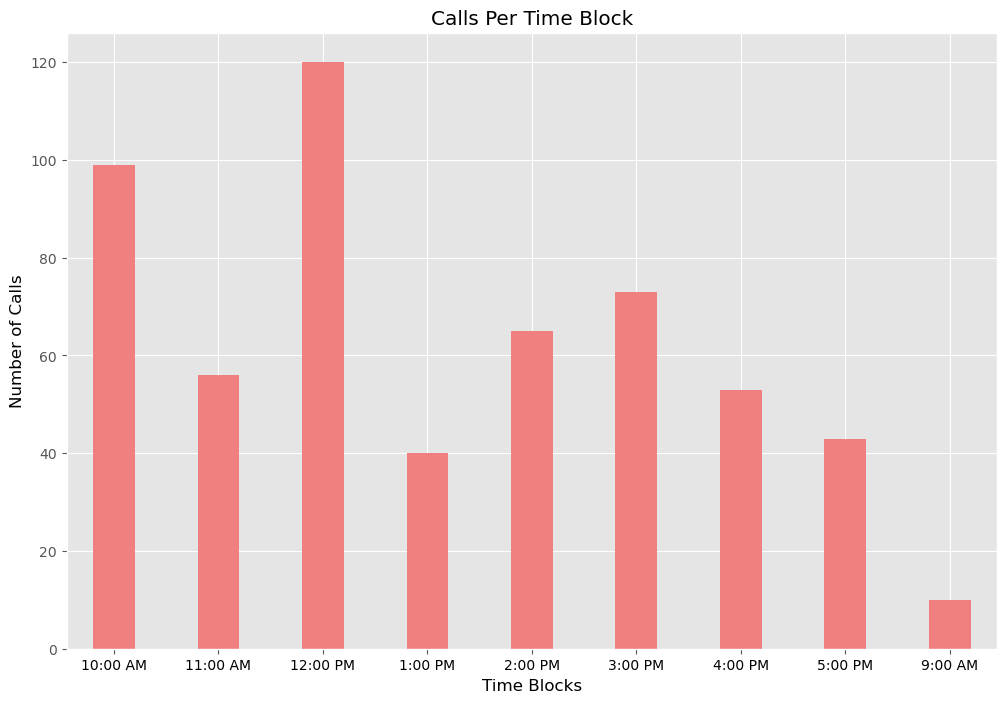

In [50]:
# Use groupby to plot based on time blocks:
call_times.groupby('Time Block')['Calls'].sum().plot.bar(color = 'lightcoral', width = 0.4)

plt.title('Calls Per Time Block',color = 'black')
plt.xticks(color = 'black', rotation=360)
plt.xlabel('Time Blocks',color = 'black')
plt.ylabel('Number of Calls',color = 'black')

plt.show()